## Importing Library

In [138]:
import numpy as np
import pandas as pd
from numpy import loadtxt
from numpy import unique
from numpy import arange
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce


## Loading of the Dataset

In [139]:
pd.pandas.set_option('display.max_columns', None)
data = pd.read_csv("G:/IAvenue/Sprint 1/sprint1data.csv")

In [140]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


*** There are 1460 samples and 81 variables including target variables.
*** We have to predict the house price on the basis of the variables given.

## Understanding the type of Data

In [141]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 43 categorical variables


In [142]:
data[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [143]:
# list of variables that contain year information
numerical = [var for var in data.columns if data[var].dtype!='O']
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var not in ['Id', 'SalePrice']]
print('There are {} year variables'.format(len(year_vars)))

There are 4 year variables


In [144]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [145]:
# let's visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(data[var].unique()) < 20 and var not in year_vars:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

There are 14 discrete variables


In [146]:
# find continuous variables
numerical = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] and var not in year_vars]
print('There are {} continous variables'.format(len(numerical)))

There are 18 continous variables


In [147]:
data[numerical].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


******There are 18 continous variables, 14 discrete variables, 4 year variables and 43 categorical variables.

## Feature Engineering ---- Extracting of new features from date variables

In [148]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object
data[discrete] = data[discrete].astype('O')

In [149]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 57 categorical variables


In [150]:
# function to calculate elapsed time
def elapsed_years(df, var):
    df[var] = df['YrSold'] - df[var]
    return df
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt',]:
    data = elapsed_years(data, var)  

In [151]:
data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


*** Discrete variables are converted into categorical variables. So, finally there are 57 categorical variables.
*** New variables are extracted from year variables by subtracting the year variables with the sold year variables.

## Finding the missing data

In [152]:
# Missing numerical data
for col in numerical+year_vars:
    if data[col].isnull().mean() > 0:
        print(col, data[col].isnull().mean())

LotFrontage 0.1773972602739726
MasVnrArea 0.005479452054794521
GarageYrBlt 0.05547945205479452


In [153]:
# Missing categorical data
for col in categorical:
    if data[col].isnull().mean() > 0:
        print(col, data[col].isnull().mean())

Alley 0.9376712328767123
MasVnrType 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


*** There are missing values in 3 numerical varibles and 16 categorical variables.

## Finding the variables with rare labels having only two categories.

In [154]:
# let's explore a few examples in which variables have only a few categories, say less than 3

for col in data.columns:
    
    if data[col].dtypes == 'O':  # if the variable is categorical
        
        if data[col].nunique() < 3:  # if the variable has less than 3 categories
            
            # print percentage of observations per category
            print(data.groupby(col)[col].count() / len(data))
            print()

Street
Grvl    0.00411
Pave    0.99589
Name: Street, dtype: float64

Alley
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

CentralAir
N    0.065068
Y    0.934932
Name: CentralAir, dtype: float64



*** Therer are 3 variables in which one of the category is more than 95 %  and other category is very small. 

## Dropping variables
*** Dropping variables which are having missing values greater than 40 % and those variables which are having only two categories and one category is more than 95 % and other is very less.

In [155]:
data.drop(columns='YrSold', axis=1, inplace=True)
data.drop(columns='FireplaceQu', axis=1, inplace=True )
data.drop(columns='PoolQC', axis=1, inplace=True)
data.drop(columns='Fence', axis=1, inplace=True)
data.drop(columns='MiscFeature', axis=1, inplace=True)
data.drop(columns='Street', axis=1, inplace=True )
data.drop(columns='Utilities', axis=1, inplace=True )
data.drop(columns='CentralAir', axis=1, inplace=True )

## Splitting of the dataset into train and test dataset

In [156]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.15,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1241, 71), (219, 71), (1241,), (219,))

## Feature Engineering---Missing Value Imputation
*** For numerical data the missing values are replaced with median value as the distribution is skewed.
*** For categorical data the missing values  are the maximum frequency data

In [157]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_train[["LotFrontage" , "MasVnrArea","GarageYrBlt"]])
X_train[["LotFrontage" , "MasVnrArea","GarageYrBlt"]] = imputer.transform(X_train[["LotFrontage" , "MasVnrArea","GarageYrBlt"]])
X_test[["LotFrontage" , "MasVnrArea","GarageYrBlt"]] = imputer.transform(X_test[["LotFrontage" , "MasVnrArea","GarageYrBlt"]])

In [158]:
#drop rows that do not have at leat 4 nan values
#categorical.dropna(thresh=4)
# Let's find the most frequent category for BsmtQual
X_train['BsmtQual'].mode()

0    TA
dtype: object

In [159]:
# Let's fill na in both train and test
# I use the fillna() method from pandas
# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['BsmtQual'].fillna('TA', inplace=True)
X_test['BsmtQual'].fillna('TA', inplace=True)

In [160]:
X_train['MasVnrType'].mode()

0    None
dtype: object

In [161]:
X_train['MasVnrType'].fillna('None', inplace=True)
X_test['MasVnrType'].fillna('None', inplace=True)

In [162]:
X_train['BsmtCond'].mode()

0    TA
dtype: object

In [163]:
X_train['BsmtCond'].fillna('TA', inplace=True)
X_test['BsmtCond'].fillna('TA', inplace=True)

In [164]:
X_train['BsmtExposure'].mode()

0    No
dtype: object

In [165]:
X_train['BsmtExposure'].fillna('No', inplace=True)
X_test['BsmtExposure'].fillna('No', inplace=True)

In [166]:
# check that NA have been filled
X_train['BsmtExposure'].isnull().sum()

0

In [167]:
X_train['BsmtFinType1'].mode()

0    Unf
dtype: object

In [168]:
X_train['BsmtFinType1'].fillna('Unf', inplace=True)
X_test['BsmtFinType1'].fillna('Unf', inplace=True)

In [169]:
X_train['BsmtFinType2'].mode()

0    Unf
dtype: object

In [170]:
X_train['BsmtFinType2'].fillna('Unf', inplace=True)
X_test['BsmtFinType2'].fillna('Unf', inplace=True)

In [171]:
X_train['Electrical'].mode()

0    SBrkr
dtype: object

In [172]:
X_train['Electrical'].fillna('SBrkr', inplace=True)
X_test['Electrical'].fillna('SBrkr', inplace=True)

In [173]:
X_train['GarageType'].mode()

0    Attchd
dtype: object

In [174]:
X_train['GarageType'].fillna('Attchd', inplace=True)
X_test['GarageType'].fillna('Attchd', inplace=True)

In [175]:
X_train['GarageFinish'].mode()

0    Unf
dtype: object

In [176]:
X_train['GarageFinish'].fillna('Unf', inplace=True)
X_test['GarageFinish'].fillna('Unf', inplace=True)

In [177]:
X_train['GarageQual'].mode()

0    TA
dtype: object

In [178]:
X_train['GarageQual'].fillna('TA', inplace=True)
X_test['GarageQual'].fillna('TA', inplace=True)

In [179]:
X_train['GarageCond'].mode()

0    TA
dtype: object

In [180]:
X_train['GarageCond'].fillna('TA', inplace=True)
X_test['GarageCond'].fillna('TA', inplace=True)

In [181]:
X_train['Alley'].mode()

0    Grvl
dtype: object

In [182]:
X_train['GarageCond'].fillna('Grvl', inplace=True)
X_test['GarageCond'].fillna('Grvl', inplace=True)

## Feature Engineering ----- Rare Labael Encoding

In [183]:
#variables have several categories, say more than 10

multi_cat_cols = []

for col in X_train.columns:

    if X_train[col].dtypes =='O': # if variable  is categorical
    
        if X_train[col].nunique() >3: # and has more than 10 categories
            
            multi_cat_cols.append(col)  # add to the list
            
            print(X_train.groupby(col)[col].count()/ len(X_train)) # and print the percentage of observations within each category
            
            print()

MSSubClass
20     0.365028
30     0.048348
40     0.002417
45     0.008864
50     0.102337
60     0.206285
70     0.043513
75     0.012893
80     0.037067
85     0.011281
90     0.033038
120    0.058824
160    0.044319
180    0.005641
190    0.020145
Name: MSSubClass, dtype: float64

MSZoning
C (all)    0.008058
FV         0.042707
RH         0.012087
RL         0.787268
RM         0.149879
Name: MSZoning, dtype: float64

LotShape
IR1    0.333602
IR2    0.027397
IR3    0.007252
Reg    0.631749
Name: LotShape, dtype: float64

LandContour
Bnk    0.043513
HLS    0.030620
Low    0.024980
Lvl    0.900886
Name: LandContour, dtype: float64

LotConfig
Corner     0.173247
CulDSac    0.066882
FR2        0.033038
FR3        0.001612
Inside     0.725222
Name: LotConfig, dtype: float64

Neighborhood
Blmngtn    0.012087
Blueste    0.001612
BrDale     0.010475
BrkSide    0.040290
ClearCr    0.020951
CollgCr    0.102337
Crawfor    0.036261
Edwards    0.067687
Gilbert    0.053989
IDOTRR     0.024980
Me

*** In these variables 'MSZoning', 'LotShape','LandContour', 'LotConfig', 'Neighborhood','Condition1','Condition2', 'BldgType', 'HouseStyle','OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation','BsmtCond', 'BsmtFinType2','Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional','GarageType','GarageQual', 'GarageCond', 'PoolArea', 'MoSold', 'SaleType',
 'SaleCondition', there are more than one rare labels having less than 5% of the whole data.

In [184]:
for col in ['MSZoning', 'LotShape','LandContour', 'LotConfig', 'Neighborhood','Condition1','Condition2', 'BldgType', 'HouseStyle',
            'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation','BsmtCond', 
            'BsmtFinType2','Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'FullBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional','GarageType', 
            'GarageQual', 'GarageCond', 'PoolArea', 'MoSold', 'SaleType','SaleCondition']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

In [185]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [186]:
def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [187]:
for variable in ['MSZoning', 'LotShape','LandContour', 'LotConfig', 'Neighborhood','Condition1','Condition2', 'BldgType', 'HouseStyle',
            'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation','BsmtCond', 
            'BsmtFinType2','Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'FullBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional','GarageType', 
            'GarageQual', 'GarageCond', 'PoolArea', 'MoSold', 'SaleType', 'SaleCondition']:
    
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

## Feature Engineering --- Categorical Encoding
*** Integer Encoding categorical encoding is implemented

In [188]:
# find categorical variables
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 50 categorical variables


In [189]:
# let's separate into training and testing set keeping target

X_train, X_test, y_train, y_test = train_test_split(
    data[['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice']],  # this time we keep the target!!
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 50), (438, 50))

In [190]:
# let's order the labels according to the mean target value

X_train.groupby(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'MoSold', 'SaleType', 'SaleCondition'])['SalePrice'].mean().sort_values()

MSSubClass  MSZoning  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  Electrical  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageFinish  GarageCars  GarageQual  GarageCond  PavedDrive  PoolArea  MoSold  SaleType  SaleCondition
20          C (all)   Reg       Lvl          Inside     Gtl        IDOTRR        Norm        Norm        1Fam      1Story      2            3            Gable      CompShg   AsbShng      AsbShng      None        TA         TA         CBlock      TA        TA        Av            BLQ           Unf           GasA     TA         FuseA       1             0             0         0         1             1             T

In [191]:
def find_category_mappings(df, variable, target):

    # first  we generate an ordered list with the labels
    ordered_labels = X_train.groupby([variable
                                      ])[target].mean().sort_values().index

    # return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [192]:
# and now we run a loop over the remaining categorical variables

for variable in ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'MoSold', 'SaleType', 'SaleCondition']:

    mappings = find_category_mappings(X_train, variable, 'SalePrice')

    integer_encode(X_train, X_test, variable, mappings)

In [193]:
# Missing numerical data
for col in X_train:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

MasVnrType 0.004892367906066536
BsmtQual 0.023483365949119372
BsmtCond 0.023483365949119372
BsmtExposure 0.023483365949119372
BsmtFinType1 0.023483365949119372
BsmtFinType2 0.02446183953033268
Electrical 0.0009784735812133072
GarageType 0.05283757338551859
GarageFinish 0.05283757338551859
GarageQual 0.05283757338551859
GarageCond 0.05283757338551859


## Dropping of those variables having at least 4 NAN values

In [194]:
#drop rows that do not have at leat 4 nan values
X_train.dropna(thresh=4)

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
64,14,3,0,1,1,0,16,4,2,4,6,6,7,1,1,11,13,2.0,1,4,4,2.0,2.0,0.0,5.0,3.0,4,4,4.0,2,2,2,2,3,3,2,7,5,0,4.0,1.0,2,2.0,3.0,2,1,2,4,3,219500
682,12,3,0,3,1,0,17,4,2,4,5,5,7,1,1,5,7,1.0,1,4,4,2.0,2.0,1.0,5.0,3.0,4,4,4.0,2,2,1,0,1,3,2,4,5,1,4.0,0.0,2,2.0,3.0,2,1,10,4,3,173000
960,11,3,1,1,1,0,4,4,2,4,5,4,5,1,1,5,8,1.0,1,3,2,1.0,2.0,3.0,1.0,3.0,4,3,4.0,2,2,1,0,1,3,1,2,5,0,NaN,NaN,0,NaN,NaN,2,1,2,4,3,116500
1384,6,3,0,1,1,0,3,4,2,4,2,5,7,1,1,4,4,1.0,1,4,1,1.0,2.0,1.0,0.0,3.0,4,2,4.0,0,2,1,0,1,3,1,4,5,0,1.0,0.0,1,2.0,3.0,1,1,0,4,3,105000
1100,0,3,0,0,1,0,8,4,2,4,5,1,7,1,1,5,7,1.0,1,4,2,1.0,1.0,0.0,0.0,3.0,4,2,2.0,0,2,1,0,2,3,0,1,5,0,1.0,0.0,1,2.0,3.0,0,1,8,4,3,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,14,3,0,1,1,0,24,4,2,4,6,7,7,1,1,11,13,2.0,2,4,4,2.0,2.0,1.0,5.0,3.0,4,4,4.0,2,2,2,2,3,3,2,7,5,1,4.0,1.0,4,2.0,3.0,2,1,7,4,3,337000
835,11,3,0,1,1,0,6,4,2,4,5,3,5,1,1,11,9,1.0,1,4,2,2.0,2.0,0.0,1.0,3.0,4,2,4.0,0,2,2,0,1,3,2,2,2,0,4.0,0.0,2,2.0,3.0,2,1,2,4,3,128000
1216,4,1,0,1,1,0,6,1,2,1,2,5,7,1,1,11,13,1.0,1,4,0,NaN,NaN,NaN,NaN,NaN,4,2,4.0,0,2,2,0,6,2,1,7,5,0,4.0,0.0,2,2.0,3.0,2,1,1,4,3,112000
559,12,3,0,1,1,0,15,4,2,3,5,6,7,1,1,11,13,2.0,2,4,4,2.0,2.0,3.0,4.0,3.0,4,4,4.0,0,2,2,0,1,3,2,5,5,1,4.0,2.0,2,2.0,3.0,2,1,0,4,3,234000


In [195]:
#drop rows that do not have at leat 4 nan values
X_test.dropna(thresh=4)

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
529,11,3,1,1,4,0,18,4,2.0,4,5,5,1,4,1.0,5,6,NaN,2,4,4,1.0,2.0,0.0,0.0,3.0,4,2,4,2,2,3,0,6,2,1,8,3.0,2,4.0,1.0,2,2.0,3.0,2,1.0,5,4,4,200624
491,6,3,0,1,1,0,10,0,2.0,4,2,5,5,1,1.0,5,7,1.0,1,4,2,1.0,2.0,0.0,1.0,2.0,4,2,3,2,2,1,0,3,3,0,3,5.0,2,4.0,0.0,1,2.0,3.0,2,1.0,6,4,3,133000
459,6,3,1,0,3,0,4,4,2.0,4,2,4,2,1,1.0,6,5,0.0,1,4,2,1.0,2.0,0.0,2.0,3.0,4,2,4,2,2,1,0,3,3,2,3,5.0,1,1.0,0.0,1,2.0,3.0,2,1.0,7,4,3,110000
279,14,3,0,1,1,0,17,4,2.0,4,6,6,7,4,1.0,8,8,2.0,1,4,2,2.0,2.0,0.0,1.0,3.0,4,4,4,0,2,2,2,6,3,1,7,5.0,1,4.0,2.0,2,2.0,3.0,2,1.0,5,4,3,192000
655,5,1,0,1,1,0,1,4,2.0,2,6,5,7,1,1.0,7,12,2.0,1,4,2,1.0,2.0,0.0,4.0,3.0,4,2,4,0,2,1,2,3,3,1,4,5.0,0,1.0,0.0,1,2.0,3.0,2,1.0,5,4,2,88000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,11,3,1,2,4,2,17,4,2.0,4,5,6,5,3,NaN,8,8,1.0,1,4,2,2.0,2.0,3.0,2.0,5.0,4,4,4,2,2,1,0,1,3,1,3,1.0,2,4.0,0.0,2,2.0,3.0,2,1.0,1,4,3,241500
445,11,3,0,1,3,0,3,4,2.0,4,5,5,7,4,1.0,5,7,1.0,1,4,2,1.0,2.0,0.0,4.0,3.0,4,1,4,0,2,1,0,3,3,1,5,5.0,1,4.0,0.0,2,2.0,3.0,2,1.0,10,3,3,127500
654,11,3,1,1,1,0,24,4,2.0,4,5,7,4,4,1.0,6,5,2.0,2,3,4,2.0,2.0,3.0,5.0,3.0,4,4,4,2,2,2,2,1,3,2,5,5.0,1,4.0,2.0,4,2.0,3.0,2,1.0,6,4,3,350000
1280,11,3,1,1,1,0,16,4,2.0,4,5,6,7,1,1.0,11,13,2.0,2,4,4,2.0,2.0,0.0,5.0,3.0,4,4,4,2,2,2,0,3,3,2,4,5.0,0,4.0,1.0,2,2.0,3.0,2,1.0,5,4,3,227000


*** Missing value imputation

In [196]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_train[["BsmtQual","MasVnrType","BsmtCond","BsmtExposure",
                     "BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond","Condition2","RoofMatl","Functional","PoolArea"]])
X_train[["BsmtQual","MasVnrType","BsmtCond","BsmtExposure",
                     "BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond","Condition2","RoofMatl","Functional","PoolArea"]] = imputer.transform(X_train[["BsmtQual","MasVnrType","BsmtCond","BsmtExposure",
                     "BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond","Condition2","RoofMatl","Functional","PoolArea"]])
X_test[["BsmtQual","MasVnrType","BsmtCond","BsmtExposure",
                     "BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond","Condition2","RoofMatl","Functional","PoolArea"]] = imputer.transform(X_test[["BsmtQual","MasVnrType","BsmtCond","BsmtExposure",
                     "BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond","Condition2","RoofMatl","Functional","PoolArea"]])

*** Dropping of the target variables

In [197]:
X_train.drop(columns='SalePrice', axis=1, inplace=True )
X_test.drop(columns='SalePrice', axis=1, inplace=True )

## Feature Selection---Using P-Values and VIF

In [198]:
X_train_consadd1 = sm.add_constant(X_train)
statregressor1 = sm.OLS(y_train,X_train_consadd1).fit()
#rsq1=ststregressor1.rsquared
#vif=round(1/(1-rsq1),2)
print(statregressor1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     99.68
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:37   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.419e+04
Df Residuals:                     972   BIC:                         2.444e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -9.79e+04   3.62e+04     -2.701

In [199]:
X_train.drop(columns='PoolArea', axis=1, inplace=True )

In [200]:
X_train_consadd2 = sm.add_constant(X_train)
statregressor2 = sm.OLS(y_train,X_train_consadd2).fit()
print(statregressor2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     101.9
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:38   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.419e+04
Df Residuals:                     973   BIC:                         2.443e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.741e+04   3.39e+04     -2.877

In [201]:
X_train.drop(columns='GarageFinish', axis=1, inplace=True )

In [202]:
X_train_consadd3 = sm.add_constant(X_train)
statregressor3= sm.OLS(y_train,X_train_consadd3).fit()
print(statregressor3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:38   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.419e+04
Df Residuals:                     974   BIC:                         2.442e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.733e+04   3.38e+04     -2.877

In [203]:
X_train.drop(columns='BsmtFinType2', axis=1, inplace=True )

In [204]:
X_train_consadd4 = sm.add_constant(X_train)
statregressor4= sm.OLS(y_train,X_train_consadd4).fit()
print(statregressor4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     106.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:39   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.419e+04
Df Residuals:                     975   BIC:                         2.442e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.642e+04   3.33e+04     -2.893

In [205]:
X_train.drop(columns='GarageType', axis=1, inplace=True )

In [206]:
X_train_consadd5 = sm.add_constant(X_train)
statregressor5= sm.OLS(y_train,X_train_consadd5).fit()
print(statregressor5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:40   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.418e+04
Df Residuals:                     976   BIC:                         2.441e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.623e+04   3.33e+04     -2.890

In [207]:
X_train.drop(columns='GarageCond', axis=1, inplace=True )

In [208]:
X_train_consadd6 = sm.add_constant(X_train)
statregressor6= sm.OLS(y_train,X_train_consadd6).fit()
print(statregressor6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     111.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:40   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.418e+04
Df Residuals:                     977   BIC:                         2.440e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.693e+04    3.3e+04     -2.934

In [209]:
X_train.drop(columns='Heating', axis=1, inplace=True )

In [210]:
X_train_consadd7 = sm.add_constant(X_train)
statregressor7= sm.OLS(y_train,X_train_consadd7).fit()
print(statregressor7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     114.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:41   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.418e+04
Df Residuals:                     978   BIC:                         2.440e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.319e+04   3.02e+04     -3.083

In [211]:
X_train.drop(columns='BsmtCond', axis=1, inplace=True )

In [212]:
X_train_consadd8 = sm.add_constant(X_train)
statregressor8= sm.OLS(y_train,X_train_consadd8).fit()
print(statregressor8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     117.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:42   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.418e+04
Df Residuals:                     979   BIC:                         2.439e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.523e+04   2.99e+04     -3.181

In [213]:
X_train.drop(columns='Foundation', axis=1, inplace=True )

In [214]:
X_train_consadd9 = sm.add_constant(X_train)
statregressor9= sm.OLS(y_train,X_train_consadd9).fit()
print(statregressor9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     120.0
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:42   Log-Likelihood:                -12046.
No. Observations:                1022   AIC:                         2.418e+04
Df Residuals:                     980   BIC:                         2.438e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.363e+04   2.98e+04     -3.142

In [215]:
X_train.drop(columns='PavedDrive', axis=1, inplace=True )

In [216]:
X_train_consadd10 = sm.add_constant(X_train)
statregressor10= sm.OLS(y_train,X_train_consadd10).fit()
print(statregressor10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:43   Log-Likelihood:                -12047.
No. Observations:                1022   AIC:                         2.418e+04
Df Residuals:                     981   BIC:                         2.438e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.372e+04   2.98e+04     -3.147

In [217]:
X_train.drop(columns='MasVnrType', axis=1, inplace=True )

In [218]:
X_train_consadd11 = sm.add_constant(X_train)
statregressor11= sm.OLS(y_train,X_train_consadd11).fit()
print(statregressor11.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     126.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:43   Log-Likelihood:                -12047.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     982   BIC:                         2.437e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.381e+04   2.98e+04     -3.151

In [219]:
X_train.drop(columns='LandContour', axis=1, inplace=True )

In [220]:
X_train_consadd12 = sm.add_constant(X_train)
statregressor12= sm.OLS(y_train,X_train_consadd12).fit()
print(statregressor12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     129.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:44   Log-Likelihood:                -12047.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     983   BIC:                         2.436e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.495e+04   2.97e+04     -3.194

In [221]:
X_train.drop(columns='HouseStyle', axis=1, inplace=True )

In [222]:
X_train_consadd13 = sm.add_constant(X_train)
statregressor13= sm.OLS(y_train,X_train_consadd13).fit()
print(statregressor13.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     133.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:45   Log-Likelihood:                -12047.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     984   BIC:                         2.436e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.784e+04   2.95e+04     -3.321

In [223]:
X_train.drop(columns='MSZoning', axis=1, inplace=True )

In [224]:
X_train_consadd14 = sm.add_constant(X_train)
statregressor14= sm.OLS(y_train,X_train_consadd14).fit()
print(statregressor14.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     136.9
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:45   Log-Likelihood:                -12048.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     985   BIC:                         2.435e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.934e+04   2.94e+04     -3.380

In [225]:
X_train.drop(columns='Electrical', axis=1, inplace=True )

In [226]:
X_train_consadd15 = sm.add_constant(X_train)
statregressor15= sm.OLS(y_train,X_train_consadd15).fit()
print(statregressor15.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     140.9
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:46   Log-Likelihood:                -12048.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     986   BIC:                         2.435e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.053e+05   2.86e+04     -3.679

In [227]:
X_train.drop(columns='BsmtFinType1', axis=1, inplace=True )

In [228]:
X_train_consadd16 = sm.add_constant(X_train)
statregressor16= sm.OLS(y_train,X_train_consadd16).fit()
print(statregressor16.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     145.0
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:47   Log-Likelihood:                -12049.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     987   BIC:                         2.434e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.075e+05   2.85e+04     -3.766

In [229]:
X_train.drop(columns='HeatingQC', axis=1, inplace=True )

In [230]:
X_train_consadd17 = sm.add_constant(X_train)
statregressor17= sm.OLS(y_train,X_train_consadd17).fit()
print(statregressor17.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     149.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:47   Log-Likelihood:                -12050.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     988   BIC:                         2.433e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.069e+05   2.86e+04     -3.745

In [231]:
X_train.drop(columns='LandSlope', axis=1, inplace=True )

In [232]:
X_train_consadd18 = sm.add_constant(X_train)
statregressor18= sm.OLS(y_train,X_train_consadd18).fit()
print(statregressor18.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     153.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:48   Log-Likelihood:                -12051.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     989   BIC:                         2.433e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.044e+05   2.85e+04     -3.661

In [233]:
X_train.drop(columns='OverallCond', axis=1, inplace=True )

In [234]:
X_train_consadd19 = sm.add_constant(X_train)
statregressor19= sm.OLS(y_train,X_train_consadd19).fit()
print(statregressor19.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     158.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:48   Log-Likelihood:                -12052.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     990   BIC:                         2.433e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.082e+05   2.84e+04     -3.808

In [235]:
X_train.drop(columns='Condition1', axis=1, inplace=True )

In [236]:
X_train_consadd20 = sm.add_constant(X_train)
statregressor20= sm.OLS(y_train,X_train_consadd20).fit()
print(statregressor20.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:49   Log-Likelihood:                -12053.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     991   BIC:                         2.432e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.048e+05   2.84e+04     -3.696

In [237]:
X_train.drop(columns='Functional', axis=1, inplace=True )

In [238]:
X_train_consadd21 = sm.add_constant(X_train)
statregressor21= sm.OLS(y_train,X_train_consadd21).fit()
print(statregressor21.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     168.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:50   Log-Likelihood:                -12055.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     992   BIC:                         2.432e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.399e+04   2.76e+04     -3.407

In [239]:
X_train.drop(columns='ExterCond', axis=1, inplace=True )

In [240]:
X_train_consadd22 = sm.add_constant(X_train)
statregressor22= sm.OLS(y_train,X_train_consadd22).fit()
print(statregressor22.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:50   Log-Likelihood:                -12056.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     993   BIC:                         2.431e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.056e+05   2.68e+04     -3.947

In [241]:
X_train.drop(columns='MoSold', axis=1, inplace=True )

In [242]:
X_train_consadd23 = sm.add_constant(X_train)
statregressor23= sm.OLS(y_train,X_train_consadd23).fit()
print(statregressor23.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     180.0
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:51   Log-Likelihood:                -12058.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     994   BIC:                         2.431e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.027e+05   2.67e+04     -3.841

In [243]:
X_train.drop(columns='Exterior2nd', axis=1, inplace=True )

In [244]:
X_train_consadd24 = sm.add_constant(X_train)
statregressor24= sm.OLS(y_train,X_train_consadd24).fit()
print(statregressor24.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:51   Log-Likelihood:                -12059.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     995   BIC:                         2.431e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.045e+05   2.67e+04     -3.906

In [245]:
X_train.drop(columns='Exterior1st', axis=1, inplace=True )

In [246]:
X_train_consadd25 = sm.add_constant(X_train)
statregressor25= sm.OLS(y_train,X_train_consadd25).fit()
print(statregressor25.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     194.0
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:52   Log-Likelihood:                -12059.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     996   BIC:                         2.430e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.038e+05   2.67e+04     -3.886

In [247]:
X_train.drop(columns='HalfBath', axis=1, inplace=True )

In [248]:
X_train_consadd26 = sm.add_constant(X_train)
statregressor26= sm.OLS(y_train,X_train_consadd26).fit()
print(statregressor26.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:53   Log-Likelihood:                -12061.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     997   BIC:                         2.429e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.098e+05   2.65e+04     -4.142

In [249]:
X_train.drop(columns='LotShape', axis=1, inplace=True )

In [250]:
X_train_consadd27 = sm.add_constant(X_train)
statregressor27= sm.OLS(y_train,X_train_consadd27).fit()
print(statregressor27.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:53   Log-Likelihood:                -12063.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     998   BIC:                         2.429e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.108e+05   2.65e+04     -4.177

In [251]:
X_train.drop(columns='MSSubClass', axis=1, inplace=True )

In [252]:
X_train_consadd28 = sm.add_constant(X_train)
statregressor28= sm.OLS(y_train,X_train_consadd28).fit()
print(statregressor28.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:54   Log-Likelihood:                -12064.
No. Observations:                1022   AIC:                         2.417e+04
Df Residuals:                     999   BIC:                         2.429e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.083e+05   2.65e+04     -4.083

In [253]:
X_train.drop(columns='BedroomAbvGr', axis=1, inplace=True )

In [254]:
X_train_consadd29 = sm.add_constant(X_train)
statregressor29= sm.OLS(y_train,X_train_consadd29).fit()
print(statregressor29.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     228.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:26:54   Log-Likelihood:                -12066.
No. Observations:                1022   AIC:                         2.418e+04
Df Residuals:                    1000   BIC:                         2.428e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.069e+05   2.65e+04     -4.028

In [255]:
X_train.columns

Index(['LotConfig', 'Neighborhood', 'Condition2', 'BldgType', 'OverallQual',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageQual',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [256]:
X_test.drop([ 'MSSubClass', 'LotShape','MSZoning', 'LandContour', 'LandSlope', 
       'Condition1',   'HouseStyle', 
       'OverallCond',   'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterCond', 'Foundation', 
       'BsmtCond',  'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 
          'Functional','HalfBath', 'BedroomAbvGr',
        'GarageType', 'GarageFinish',  
       'GarageCond', 'PavedDrive', 'PoolArea', 'MoSold'], axis=1, inplace=True )

In [257]:
X_test.shape

(438, 21)

** Those variables having P value grater than 5% are dropped as the significance level is fixed at 5%. Only 21 variables are finally left.

## Feature Selection---To check the multicollinearity

In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_new = X_train
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,KitchenAbvGr,216.95
2,Condition2,172.27
11,BsmtHalfBath,67.67
18,GarageQual,64.87
4,OverallQual,48.22
19,SaleType,44.92
3,BldgType,35.38
20,SaleCondition,29.99
7,ExterQual,19.89
12,FullBath,19.85


In [259]:
X_train.drop([ 'KitchenAbvGr','Condition2'], axis=1, inplace=True )

In [260]:
X_test.drop([ 'KitchenAbvGr','Condition2'], axis=1, inplace=True )

In [281]:
# Save the train and test sets 

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)
X_train.to_csv('SelectedFeatures.csv', index=False)

In [310]:
# Display selected features
features = pd.read_csv('SelectedFeatures.csv')

In [313]:
#features = features['0'].to_list(10) 
#features
features = X_train. loc[0]
print(features)

LotConfig         1.0
Neighborhood     16.0
BldgType          4.0
OverallQual       6.0
RoofStyle         1.0
RoofMatl          1.0
ExterQual         2.0
BsmtQual          2.0
BsmtExposure      0.0
BsmtFullBath      2.0
BsmtHalfBath      2.0
FullBath          2.0
KitchenQual       2.0
TotRmsAbvGrd      7.0
Fireplaces        0.0
GarageCars        2.0
GarageQual        2.0
SaleType          4.0
SaleCondition     3.0
Name: 0, dtype: float64


#  Machine Learning Model Building

## LASSO Regression Model

In [262]:
LinRegression = Pipeline([('Lasso',Lasso ())])

In [263]:
# let's fit the pipeline
LinRegression.fit(X_train, y_train)
# let's get the predictions
X_train_preds = LinRegression.predict(X_train)
X_test_preds = LinRegression.predict(X_test)
# check model performance:
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train r2: 0.82552309179266
test r2: 0.7819389268532118


## Random Forest ML

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = { 'n_estimators': [100,200], 'max_features': ['auto', 'sqrt'],
              'max_depth': [100,200,2000], 'min_samples_split': [2, 5]
              }
rfr = RandomForestRegressor(random_state = 1)
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 5, n_jobs = -1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [265]:
RFRegression=Pipeline([
('Decision',RandomForestRegressor(max_depth=2000, max_features= 'sqrt', n_estimators=200,bootstrap='True',
                                  random_state =1,min_samples_split=2))
])
RFRegression.fit(X_train,y_train)
#prediction
X_train_pred=RFRegression.predict(X_train)
X_test_pred=RFRegression.predict(X_test)
print('train r2: {}'.format(r2_score(y_train,X_train_pred)))

print('test r2: {}'.format(r2_score(y_test,X_test_pred)))


train r2: 0.9768798605471771
test r2: 0.8523812676389534


## SVR ML

In [266]:
from sklearn.svm import SVR
param_grid = {'kernel':['linear','rbf'],'gamma':['scale','auto'],'C':[1,10,100] }
svr=SVR()
g_search = GridSearchCV( estimator=svr,param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [267]:
SVRRegression=Pipeline([
    ('SVR' ,SVR(kernel = 'linear',C=100,gamma='scale'))
])
SVRRegression.fit(X_train,y_train)
#prediction
X_train_pred=SVRRegression.predict(X_train)
X_test_pred=SVRRegression.predict(X_test)
print('train r2: {}'.format(r2_score(y_train,X_train_pred)))

print('test r2: {}'.format(r2_score(y_test,X_test_pred)))

train r2: 0.7894574173247283
test r2: 0.7527204510412424


## Decision Tree ML

In [268]:
param_grid = {'criterion':['mse'], 'max_depth':[1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[1,5,10,None],
              'min_samples_leaf':[1,5,8,10,20,None]}
DT=DecisionTreeRegressor()
g_search = GridSearchCV( estimator=DT,param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.42825247 0.42825247        nan        nan 0.42825247
 0.42825247        nan        nan 0.42825247 0.42825247        nan
        nan 0.42825247 0.42825247        nan        nan 0.42825247
 0.42825247        nan        nan        nan        nan        nan
        nan 0.60324901 0.60324901        nan        nan 0.60324901
 0.60324901        nan        nan 0.60324901 0.60324901        nan
        nan 0.60324901 0.60324901        nan        nan 0.60324901
 0.60324901        nan        nan        nan        nan        nan
        nan 0.65093707 0.65093707        nan        nan 0.64751585
 0.64751585        nan        nan 0.65567132 0.65567132        nan
        nan 0.67093487 0.67093487        nan        nan 0.67460902
 0.67460902        nan        nan        nan        nan        nan
        nan 0.69788528 0.69689498        nan        na

In [269]:
DTRegression=Pipeline([
    ('Decision',DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=5,
                                      min_samples_leaf=10,random_state = 0))
])
DTRegression.fit(X_train,y_train)
#prediction
X_train_pred=DTRegression.predict(X_train)
X_test_pred=DTRegression.predict(X_test)
print('train r2: {}'.format(r2_score(y_train,X_train_pred)))

print('test r2: {}'.format(r2_score(y_test,X_test_pred)))

train r2: 0.8309633793875655
test r2: 0.7559616113784382


## Feature Importance

** SET THE MODEL SEED

In [272]:
# define the model
model = RandomForestRegressor(max_depth=2000, max_features= 'sqrt', n_estimators=200,bootstrap='True'
                                      ,random_state=1,min_samples_split=2)
# fit the model
model.fit(X_train,y_train)
#prediction
X_train_pred=model.predict(X_train)
X_test_pred=model.predict(X_test)
print('train r2: {}'.format(r2_score(y_train,X_train_pred)))

print('test r2: {}'.format(r2_score(y_test,X_test_pred)))


train r2: 0.9768798605471771
test r2: 0.8523812676389534


Feature: 0, Score: 0.01527
Feature: 1, Score: 0.17036
Feature: 2, Score: 0.01111
Feature: 3, Score: 0.20116
Feature: 4, Score: 0.01561
Feature: 5, Score: 0.00944
Feature: 6, Score: 0.10606
Feature: 7, Score: 0.06820
Feature: 8, Score: 0.02004
Feature: 9, Score: 0.02105
Feature: 10, Score: 0.00650
Feature: 11, Score: 0.05514
Feature: 12, Score: 0.05819
Feature: 13, Score: 0.06133
Feature: 14, Score: 0.05058
Feature: 15, Score: 0.10164
Feature: 16, Score: 0.00402
Feature: 17, Score: 0.01085
Feature: 18, Score: 0.01342


Text(0.5, 1.0, 'Feature Importance')

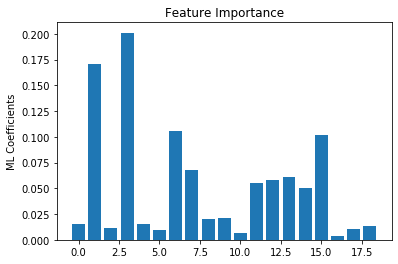

In [279]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#importance.sort_values(inplace=True, ascending=False)
pyplot.bar([x for x in range(len(importance))], importance)
plt.ylabel('ML Coefficients')
plt.title('Feature Importance')
